question 01:

Runtime for 1 qubits: 0.07528877 seconds
Runtime for 2 qubits: 0.00619149 seconds
Runtime for 3 qubits: 0.00299144 seconds
Runtime for 4 qubits: 0.00252986 seconds
Runtime for 5 qubits: 0.00305891 seconds
Runtime for 6 qubits: 0.01412439 seconds
Runtime for 7 qubits: 0.00812578 seconds
Runtime for 8 qubits: 0.01608205 seconds
Runtime for 9 qubits: 0.04847240 seconds
Runtime for 10 qubits: 0.20901132 seconds
Runtime for 11 qubits: 0.64343047 seconds
Runtime for 12 qubits: 2.39688897 seconds
Runtime for 13 qubits: 18.57074785 seconds
Runtime for 14 qubits: 70.86238647 seconds


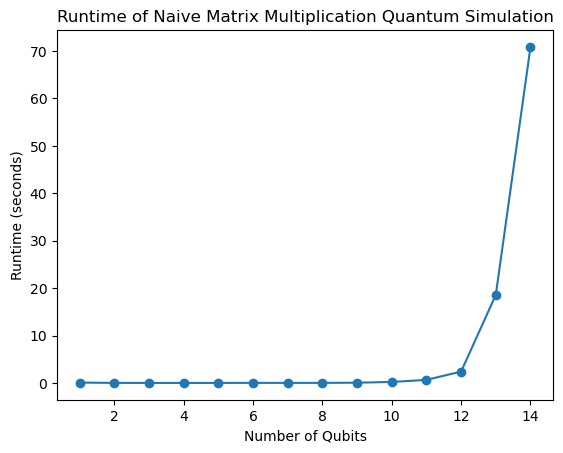

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define basic gates
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# Initialize n-qubit |0> state
def initialize_state(n):
    state = np.zeros(2**n)
    state[0] = 1
    return state

# Apply a single-qubit gate on a specific target qubit in an n-qubit state
def apply_single_qubit_gate(state, gate, target, n):
    full_gate = 1
    for i in range(n):
        if i == target:
            full_gate = np.kron(full_gate, gate)
        else:
            full_gate = np.kron(full_gate, I)
    return full_gate @ state

# Apply two-qubit gate like CNOT to specific control and target qubits in an n-qubit system
def apply_two_qubit_gate(state, gate, control, target, n):
    # Ensuring control is less than target for simplicity
    if control > target:
        control, target = target, control

    # Constructing the full gate using Kronecker products
    full_gate = 1
    for i in range(n):
        if i == control:
            full_gate = np.kron(full_gate, gate[:2, :2])  # Upper-left block (acts like I on |00>)
        elif i == target:
            full_gate = np.kron(full_gate, gate[2:, 2:])  # Bottom-right block (acts on |11>)
        else:
            full_gate = np.kron(full_gate, I)
    return full_gate @ state

# Measure runtime for different numbers of qubits
num_qubits = range(1, 15)
times = []

for n in num_qubits:
    state = initialize_state(n)
    start_time = time.time()
    
    # Apply Hadamard gate to the first qubit
    state = apply_single_qubit_gate(state, H, 0, n)
    
    # Apply X gate to the second qubit if it exists
    if n > 1:
        state = apply_single_qubit_gate(state, X, 1, n)
    
    # Apply CNOT with control on the first and target on the second qubit
    if n > 1:
        state = apply_two_qubit_gate(state, CNOT, 0, 1, n)
    
    # Record runtime
    times.append(time.time() - start_time)

    print(f"Runtime for {n} qubits: {times[-1]:.8f} seconds")

# Plot the runtime as a function of the number of qubits
plt.plot(num_qubits, times, marker='o')
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Naive Matrix Multiplication Quantum Simulation")
plt.show()



straightforward but impractical for larger systems due to the exponential growth in memory and time.

How many qubits can be simulated this way?
Typically, for matrix multiplication, practical limits on a standard computer are around 20-25 qubits. Beyond that, the state vector becomes too large to fit into memory (due to exponential scaling).

Runtime for 1 qubits: 0.00000000 seconds
Runtime for 2 qubits: 0.00098634 seconds
Runtime for 3 qubits: 0.00000000 seconds
Runtime for 4 qubits: 0.00000000 seconds
Runtime for 5 qubits: 0.00000000 seconds
Runtime for 6 qubits: 0.00251341 seconds
Runtime for 7 qubits: 0.00101852 seconds
Runtime for 8 qubits: 0.16993618 seconds
Runtime for 9 qubits: 0.00000000 seconds
Runtime for 10 qubits: 0.00000000 seconds
Runtime for 11 qubits: 0.00000000 seconds
Runtime for 12 qubits: 0.00099254 seconds
Runtime for 13 qubits: 0.00099707 seconds
Runtime for 14 qubits: 0.00140810 seconds
Runtime for 15 qubits: 0.00252819 seconds
Runtime for 16 qubits: 0.00193524 seconds
Runtime for 17 qubits: 0.00602484 seconds
Runtime for 18 qubits: 0.01398635 seconds
Runtime for 19 qubits: 0.02972817 seconds
Runtime for 20 qubits: 0.04767442 seconds
Runtime for 21 qubits: 0.09603238 seconds
Runtime for 22 qubits: 0.19282603 seconds
Runtime for 23 qubits: 0.46863604 seconds
Runtime for 24 qubits: 0.74549556 seconds
R

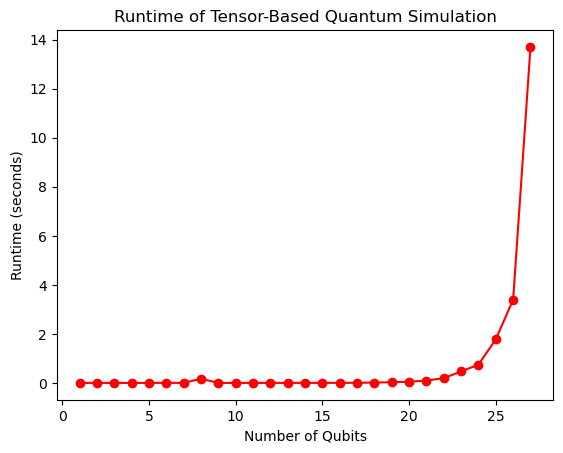

In [2]:
# Initialize tensor state for n qubits
def initialize_tensor_state(n):
    state = np.zeros([2] * n)      # Create a tensor with shape (2, 2, ..., 2)
    state[(0,) * n] = 1            # Set the |0>...|0> state
    return state

# Apply a single-qubit gate to a specific qubit in tensor form
def apply_single_qubit_gate_tensor(state, gate, target):
    axes = [target] + list(range(target)) + list(range(target + 1, len(state.shape)))
    return np.tensordot(gate, state, axes=([1], [target]))

# Apply CNOT gate on a 2-qubit system with specified control and target qubits
def apply_cnot_gate_tensor(state, control, target):
    CNOT_tensor = np.array([[[[1, 0], [0, 1]], [[0, 1], [1, 0]]],
                            [[[0, 1], [1, 0]], [[1, 0], [0, 1]]]])
    return np.tensordot(CNOT_tensor, state, axes=([2, 3], [control, target]))

# Measure runtime for tensor-based simulation
times_tensor = []
num_qubits = range(1, 28)

for n in num_qubits:
    # Initialize tensor state
    state_tensor = initialize_tensor_state(n)
    
    # Start timer
    start_time = time.time()
    
    # Apply Hadamard gate to the first qubit
    state_tensor = apply_single_qubit_gate_tensor(state_tensor, H, 0)
    
    # Apply X gate to the second qubit if it exists
    if n > 1:
        state_tensor = apply_single_qubit_gate_tensor(state_tensor, X, 1)
    
    # Apply CNOT with control on the first and target on the second qubit
    if n > 1:
        state_tensor = apply_cnot_gate_tensor(state_tensor, 0, 1)
    
    # Stop timer and record runtime
    times_tensor.append(time.time() - start_time)

    print(f"Runtime for {n} qubits: {times_tensor[-1]:.8f} seconds")

# Plot the runtime for tensor-based simulation
plt.plot(num_qubits, times_tensor, marker='o', color='red')
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime of Tensor-Based Quantum Simulation")
plt.show()

Tensor multiplication reduces computational overhead by treating multi-qubit gates more naturally.


simulate a slightly larger number of qubits, around 30-35 qubits on standard hardware, because tensor operations are more memory-efficient.

so mainly : 

Comparison Between Matrix and Tensor Multiplication Approaches
Matrix Multiplication (Naive Approach):

Simple to implement but scales poorly with the number of qubits.
Practical upper limit: 20-25 qubits.
Tensor Multiplication (Advanced Approach):

More complex to implement but better for large systems.
Practical upper limit: 30-35 qubits.

Question 03 :


The statevector stores the amplitudes for all possible basis states. Sampling from it involves:

Converting amplitudes to probabilities by squaring the absolute values.
Randomly choosing an outcome using the probability distribution.

Sampling Measurement Outcomes:

Purpose: Simulates the process of quantum measurement by collapsing the state and providing a classical result.

Relevance: Models how quantum computers behave in practice by producing measurement outcomes based on probabilities.

In [3]:
import numpy as np

# Example: 2-qubit state vector with normalized amplitudes
state_vector = np.array([0.5, 0.5, 0.5, 0.5])

# Step 1: Calculate probabilities
probabilities = np.abs(state_vector) ** 2  # [0.25, 0.25, 0.25, 0.25]

# Step 2: Sample a basis state based on the probabilities
outcome = np.random.choice(len(state_vector), p=probabilities)

# Print the binary representation of the outcome (e.g., |01>)
print(f"Measured state: |{outcome:02b}>")


Measured state: |01>


the expectation value of an operator 
𝑂
O in a state 
∣
Ψ
⟩
∣Ψ⟩ is:

⟨
Ψ
∣
𝑂
∣
Ψ
⟩
=
Ψ
†
⋅
𝑂
⋅
Ψ
⟨Ψ∣O∣Ψ⟩=Ψ 
†
 ⋅O⋅Ψ


Here:

Ψ
†
Ψ 
†
is the conjugate transpose of the statevector.


O is the operator matrix (like Pauli matrices or Hamiltonians).

Expectation Value Calculation:

Purpose: Computes the average value of an observable in a quantum state.

Relevance: Essential for understanding system properties and dynamics.

In [4]:
# Example: 2-qubit state vector
state_vector = np.array([0.5, 0.5, 0.5, 0.5])

# Operator: Identity matrix (4x4)
operator = np.eye(4)

# Step 1: Compute the conjugate transpose of the statevector
conjugate_state = np.conj(state_vector).T

# Step 2: Calculate the expectation value ⟨Ψ| O |Ψ⟩
expectation_value = conjugate_state @ operator @ state_vector

print(f"Expectation Value: {expectation_value}")


Expectation Value: 1.0
